In [1]:
%pylab inline

import warnings
warnings.filterwarnings('ignore');

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('data.csv')

In [3]:
print('Train: ',df.shape)

Train:  (532428, 45)


In [4]:
dfcol=list(df.columns)
dfcol

['member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'batch_enrolled',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'application_type',
 'verification_status_joint',
 'last_week_pay',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'loan_status']

In [5]:
#feature Information
col_desc = pd.read_excel("col_desc.xlsx")
col_desc=col_desc.set_index('Variable')
col_desc

,Description
Variable,
member_id,unique ID assigned to each member
loan_amnt,loan amount ($) applied by the member
funded_amnt,loan amount ($) sanctioned by the bank
funded_amnt_inv,loan amount ($) sanctioned by the investors
term,term of loan (in months)
batch_enrolled,batch numbers allotted to members
int_rate,interest rate (%) on loan
grade,grade assigned by the bank
sub_grade,grade assigned by the bank


In [6]:
df.sample(2)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
488734,68017191,12225,12225,12225.0,36 months,,15.41,D,D1,Senior Engineer,6 years,RENT,85000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,301xx,GA,4.04,0.0,1.0,NaN,NaN,8.0,0.0,10030.0,83.6,11.0,f,300.05,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,10030.0,12000.0,0
520119,22991466,15500,15500,15500.0,36 months,,14.49,C,C4,installer fabricator,6 years,RENT,40000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,531xx,WI,17.73,0.0,1.0,NaN,36.0,13.0,2.0,15737.0,62.9,16.0,f,2693.64,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,15737.0,25000.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [8]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [9]:
df.dropna(subset = ["emp_length"], inplace=True)

In [10]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  80791
int_rate                            0
grade                               0
sub_grade                           0
emp_title                        4164
emp_length                          0
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           433011
purpose                             0
title                              85
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         258462
mths_since_last_record         430168
open_acc                           16
pub_rec     

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505537 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    505537 non-null  int64  
 1   loan_amnt                    505537 non-null  int64  
 2   funded_amnt                  505537 non-null  int64  
 3   funded_amnt_inv              505537 non-null  float64
 4   term                         505537 non-null  object 
 5   batch_enrolled               424746 non-null  object 
 6   int_rate                     505537 non-null  float64
 7   grade                        505537 non-null  object 
 8   sub_grade                    505537 non-null  object 
 9   emp_title                    501373 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               505537 non-null  object 
 12  annual_inc                   505534 non-null  float64
 13 

In [12]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.055370e+05,505537.000000,505537.000000,505537.000000,505537.000000,5.055340e+05,505537.000000,505521.000000,505521.000000,247075.000000,75369.000000,505521.000000,505521.000000,5.055370e+05,505259.000000,505521.000000,505537.000000,505537.000000,505537.000000,505537.000000,505442.000000,125225.000000,505521.000000,464785.000000,4.647850e+05,4.647850e+05,505537.000000
mean,3.482893e+07,14914.609811,14900.773979,14859.813176,13.239572,7.634532e+04,18.062986,0.317146,0.695945,33.902973,69.961284,11.611379,0.188406,1.707629e+04,55.216013,25.336928,1777.996008,0.401678,46.512485,4.933482,0.014261,44.037772,0.005036,208.731917,1.420793e+05,3.225085e+04,0.240020
std,2.413835e+07,8449.633682,8444.392472,8457.946001,4.382774,6.609792e+04,8.279385,0.862764,0.999102,21.865405,28.253063,5.324433,0.578852,2.259802e+04,23.837135,11.846856,2112.245831,4.128666,414.865505,63.955686,0.133048,22.179270,0.079303,1934.060219,1.551993e+05,3.841709e+04,0.427096
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.077196e+07,8325.000000,8325.000000,8150.000000,9.990000,4.700000e+04,11.890000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.529000e+03,37.900000,17.000000,451.800000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,3.094700e+04,1.410000e+04,0.000000
50%,3.697639e+07,13200.000000,13200.000000,13150.000000,12.990000,6.500000e+04,17.580000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.200500e+04,56.100000,24.000000,1093.020000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.370900e+04,2.390000e+04,0.000000
75%,5.812459e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.830000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.103100e+04,73.700000,32.000000,2268.350000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.118270e+05,4.010000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,380.530000,30.000000,31.000000,176.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,176.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [13]:
def plot_hist(df,col,bin_size,log=None):
    fig = plt.figure(figsize=(30, 6))
    ax = fig.add_subplot(111)
    if log==True:
        x0 = np.log(df[df.loan_status==0][col].dropna().values+1)
        x1 = np.log(df[df.loan_status==1][col].dropna().values+1)
        min_ = min(np.log(df[col].dropna().values+1))
        max_ = max(np.log(df[col].dropna().values+1))
        bins = np.linspace(min_,max_,bin_size)
    else:
        x0 = df[df.loan_status==0][col].dropna().values
        x1 = df[df.loan_status==1][col].dropna().values
        bins = np.linspace(df[col].min(),df[col].max(),bin_size)
    ax.hist(x1,bins=bins,label='1',color='r',alpha=0.5)
    ax.hist(x0,bins=bins,label='0',color='y',alpha=0.5)
    ax.set_ylabel("total members")
    ax.set_xlabel(col)
    ax.set_title("{} vs defaulter(0,1)".format(col))
    ax.set_xticks(bins)
    plt.xticks(rotation=70)
    plt.legend(loc='upper right')
    plt.show()
    return

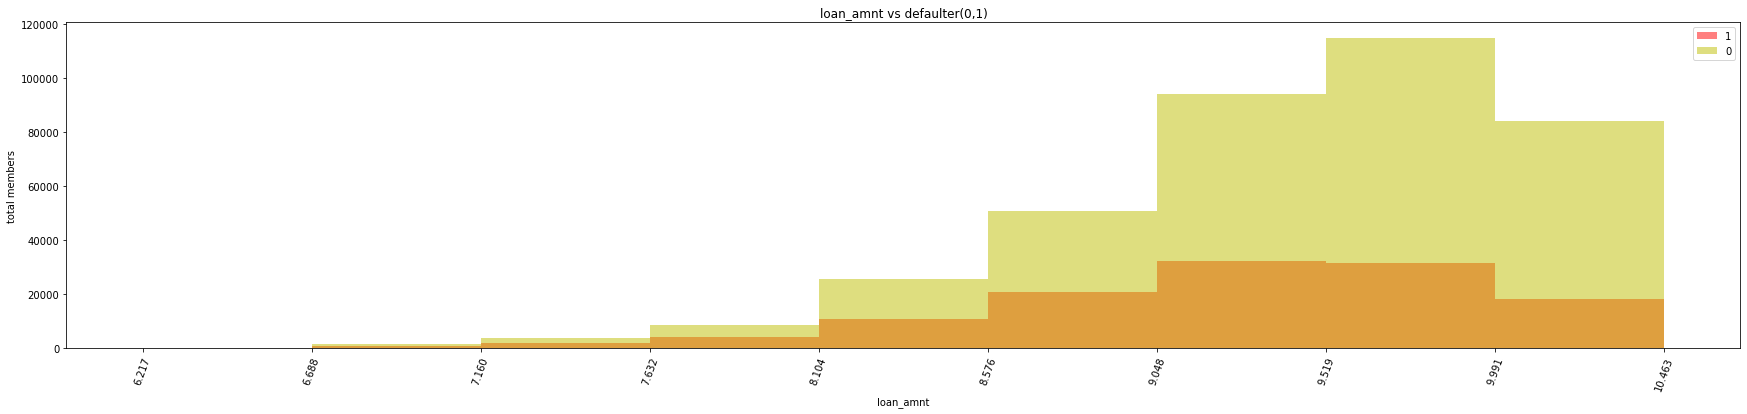

In [14]:
plot_hist(df,'loan_amnt',10,True)

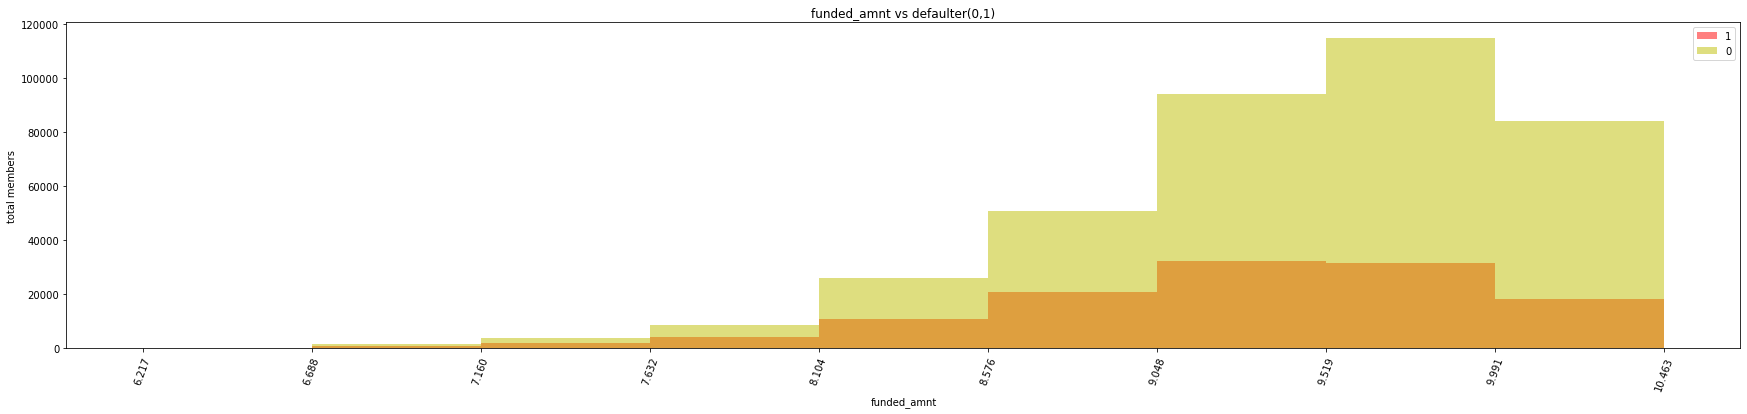

In [15]:
plot_hist(df,'funded_amnt',10,True)

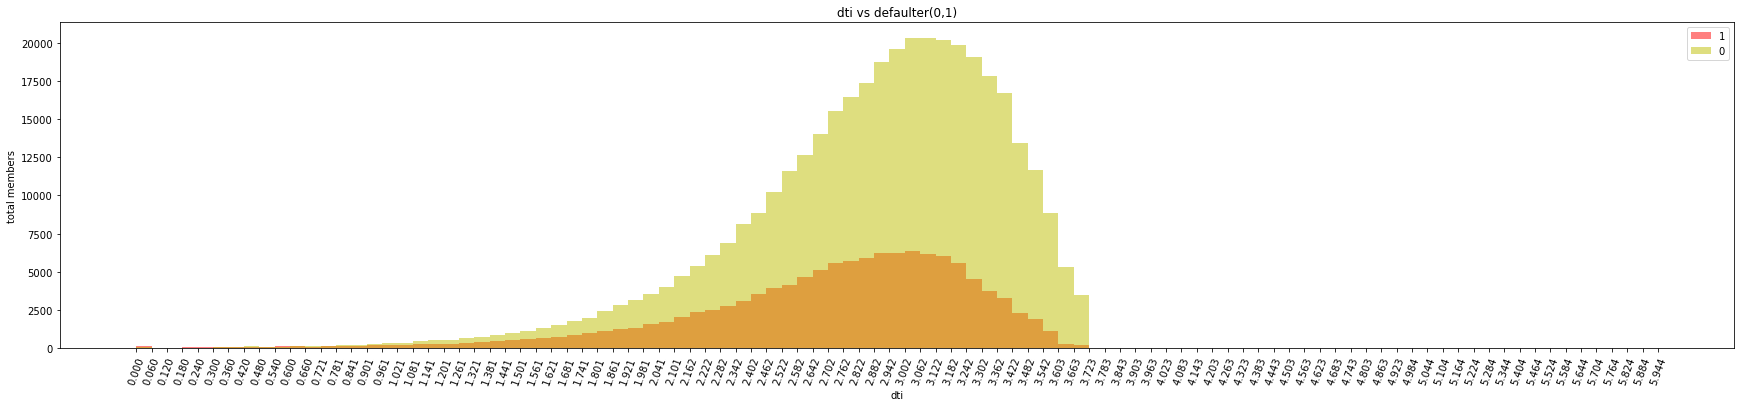

In [16]:
plot_hist(df,'dti',100,True)

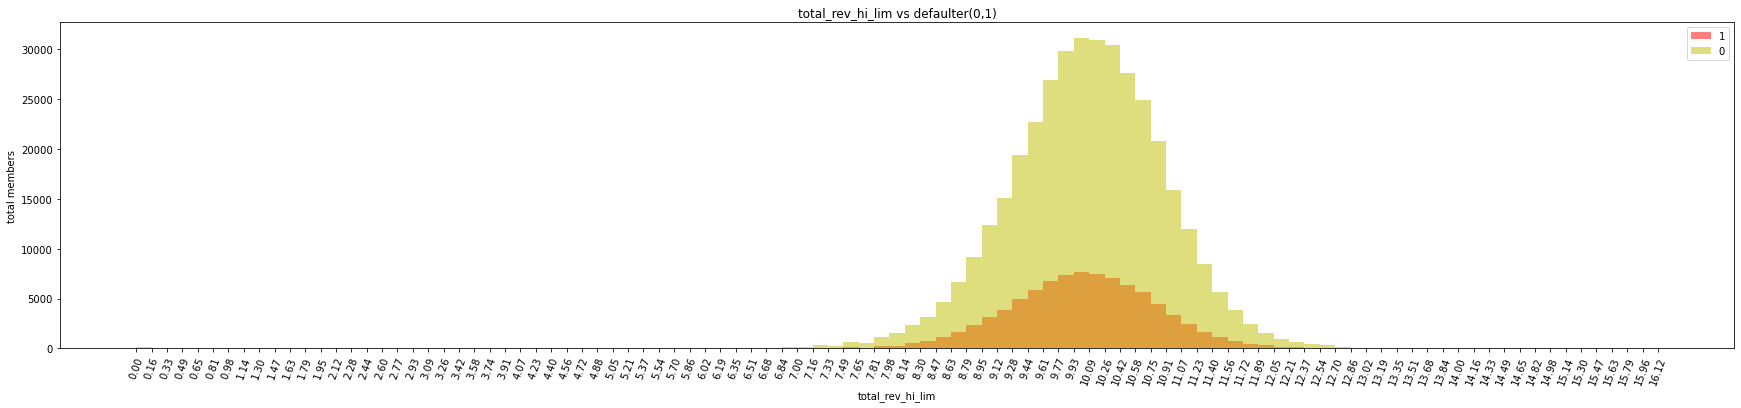

In [17]:
plot_hist(df,'total_rev_hi_lim',100,True)

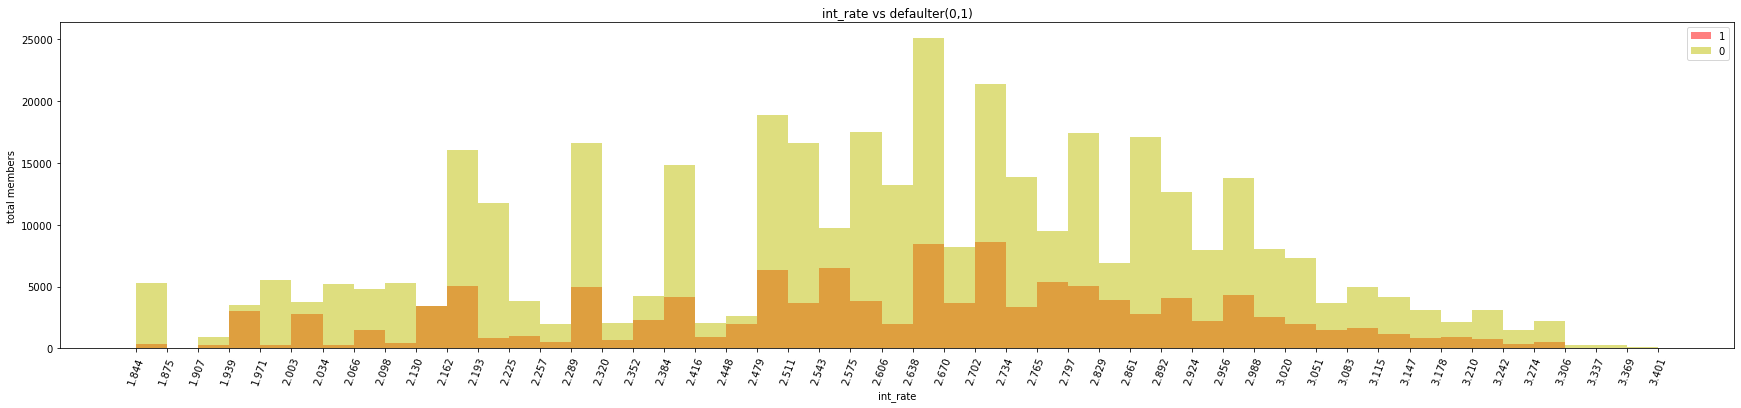

In [18]:
plot_hist(df,'int_rate',50,True)

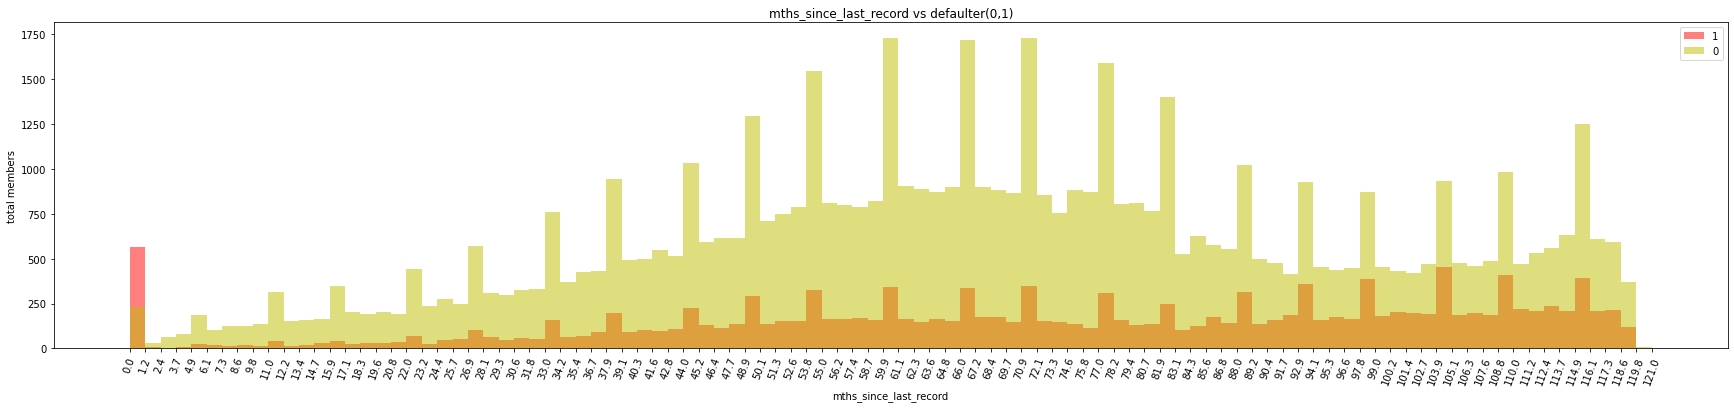

In [19]:
plot_hist(df,'mths_since_last_record',100)

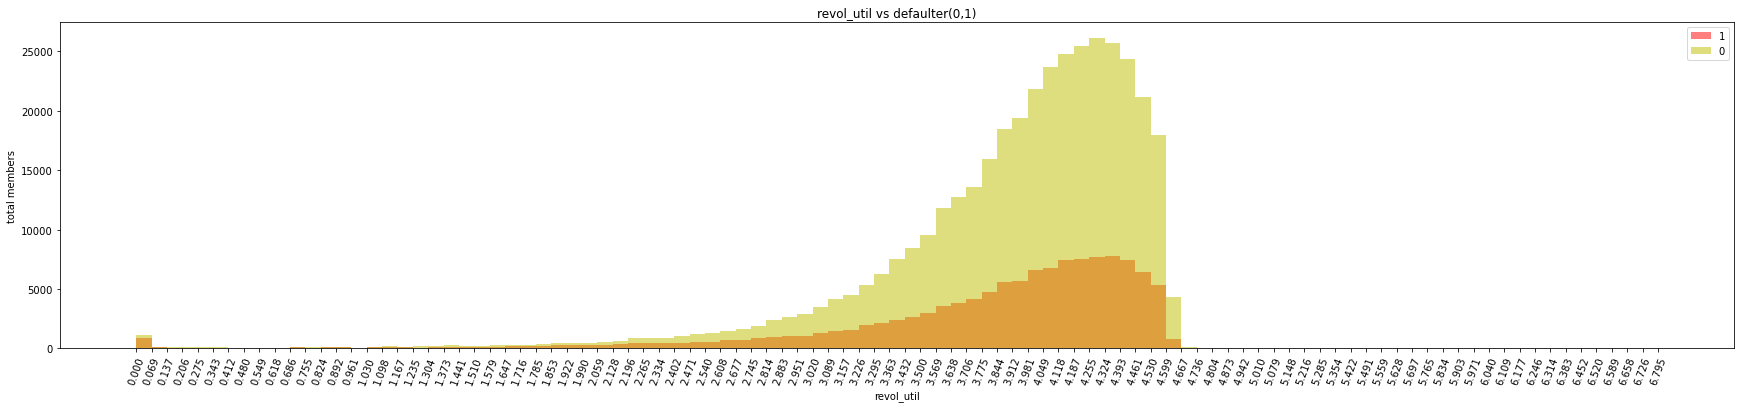

In [20]:
plot_hist(df,'revol_util',100,True)

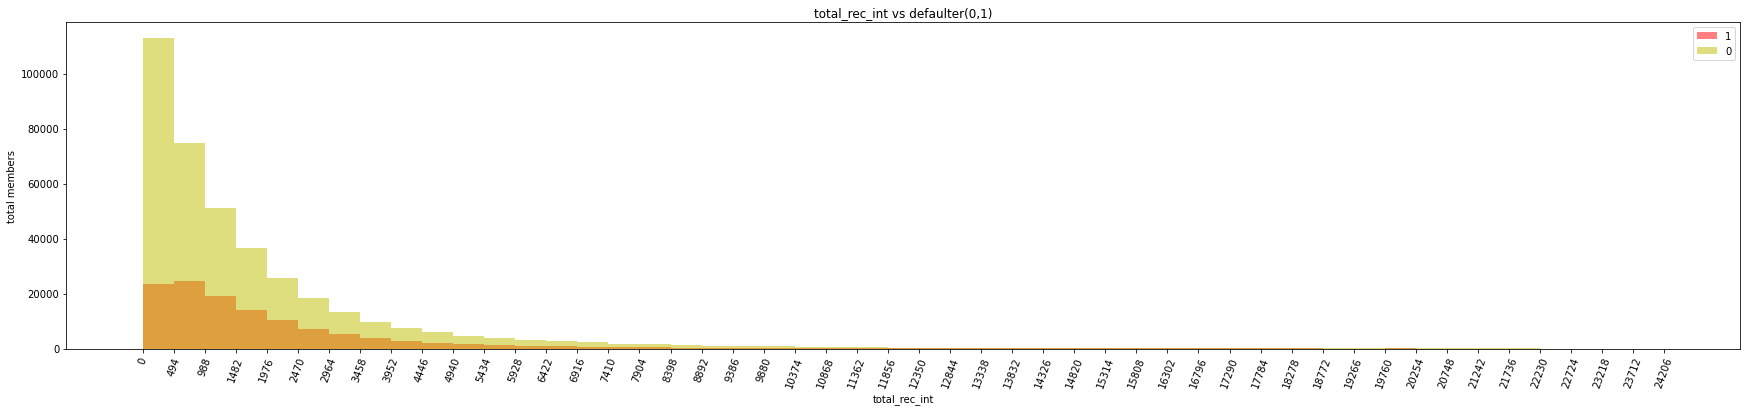

In [21]:
plot_hist(df,'total_rec_int',50)

In [22]:
def pivot(col): ### pivot_table for two categorical features one being loan_status
    return pd.pivot_table(df,'member_id',index=[col],columns=['loan_status'],aggfunc='count')

def group(col): ### create group of two categorical feature one being loan_status
    return df[[col,'loan_status']].groupby([col],as_index=False).mean().sort_values(by='loan_status',ascending=False)


In [23]:
def plot_bar(col):
    df = pivot(col)
    name_x = list(df.index)
    y1 = df[1].values/532428.0
    y0 = df[0].values/532428.0
    x = np.array(range(1,len(name_x)+1))
    

    fig= plt.figure(figsize=(30,8))
    ax = fig.add_subplot(111)
    ax.bar(x-0.25,y0,width=0.25,color='r')
    ax.bar(x,y1,width=0.25,color='b')
    
    ax.set_ylabel(col)
    ax.set_title("{} vs defaulter(0,1)".format(col))
    ax.set_xticks(x)
    ax.set_xticklabels(name_x)
    ax.legend(['0','1'], loc='upper right')
    plt.xticks(rotation=70)
    plt.show()
    return

In [24]:
#removing the string months in term column
def removeMonths(x):
    return int(int(str(x)[:2]))
df.term = df.term.apply(removeMonths)
df.sample(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
238176,37035913,8000,8000,8000.0,36,BAT2558388,12.39,C,C1,medical biller,8 years,RENT,32000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,019xx,MA,31.95,0.0,1.0,33.0,NaN,10.0,0.0,11655.0,56.6,21.0,f,964.56,0.0,0.00,0.0000,0.0,33.0,INDIVIDUAL,NaN,61th week,0.0,0.0,21459.0,20600.0,0
183529,2546882,4000,4000,4000.0,36,BAT5547201,17.77,D,D1,Douglas County BOC,3 years,MORTGAGE,57000.0,Verified,n,NaN,other,Other,300xx,GA,32.63,0.0,1.0,34.0,NaN,22.0,0.0,5811.0,84.2,45.0,w,1189.33,0.0,0.00,0.0000,0.0,NaN,INDIVIDUAL,NaN,161th week,0.0,500.0,417353.0,6900.0,1
232590,875127,15000,15000,15000.0,36,,15.28,D,D3,so good jewelry,6 years,RENT,36000.0,Not Verified,n,NaN,small_business,personal,021xx,MA,11.20,0.0,0.0,NaN,NaN,7.0,0.0,13112.0,49.3,12.0,f,3696.37,0.0,353.56,3.5356,0.0,NaN,INDIVIDUAL,NaN,143th week,0.0,NaN,NaN,NaN,0


36    351106
60    154431
Name: term, dtype: int64


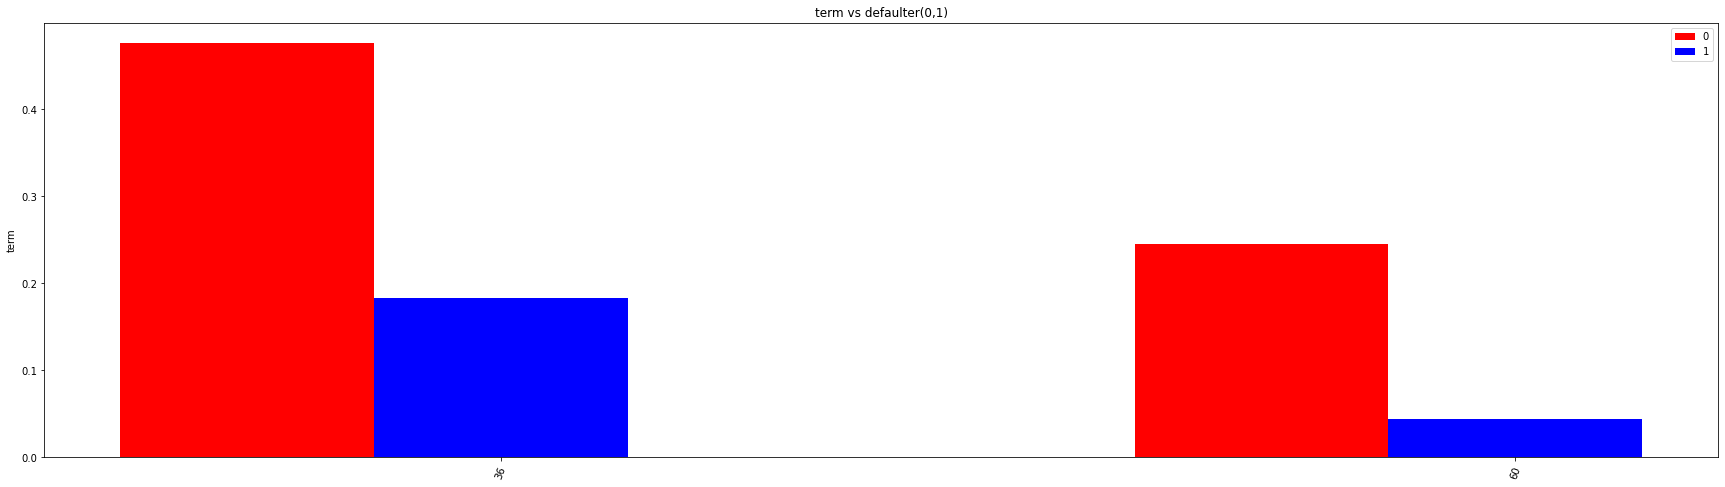

In [25]:
print(df.term.value_counts())
plot_bar('term');

In [26]:
print(df.emp_length.value_counts())

10+ years    175105
2 years       47276
< 1 year      42253
3 years       42175
1 year        34202
5 years       33393
4 years       31581
7 years       26680
8 years       26443
6 years       25741
9 years       20688
Name: emp_length, dtype: int64


In [27]:
df.emp_length.replace('< 1 year','0.5 years',inplace=True )
df.emp_length.replace('10+ years','10 years',inplace=True )

In [28]:
print(df.emp_length.value_counts())

10 years     175105
2 years       47276
0.5 years     42253
3 years       42175
1 year        34202
5 years       33393
4 years       31581
7 years       26680
8 years       26443
6 years       25741
9 years       20688
Name: emp_length, dtype: int64


In [29]:
def removeYears(x):
    return float(x.split(" ")[0])
df.emp_length = df.emp_length.apply(removeYears)

10.0    175105
2.0      47276
0.5      42253
3.0      42175
1.0      34202
5.0      33393
4.0      31581
7.0      26680
8.0      26443
6.0      25741
9.0      20688
Name: emp_length, dtype: int64


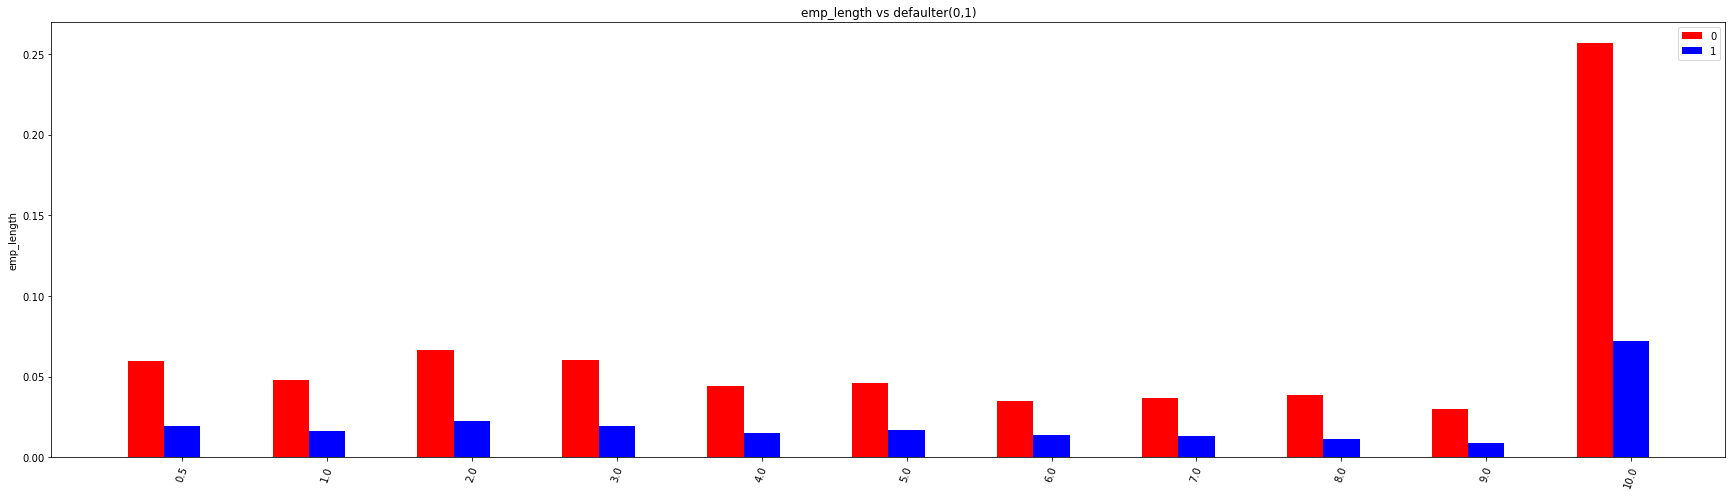

In [30]:
print(df.emp_length.value_counts())
plot_bar('emp_length')

In [31]:
print(df.home_ownership.value_counts())

MORTGAGE    253475
RENT        204379
OWN          47531
OTHER          114
NONE            35
ANY              3
Name: home_ownership, dtype: int64


MORTGAGE    253475
RENT        204379
OWN          47531
OTHER          152
Name: home_ownership, dtype: int64


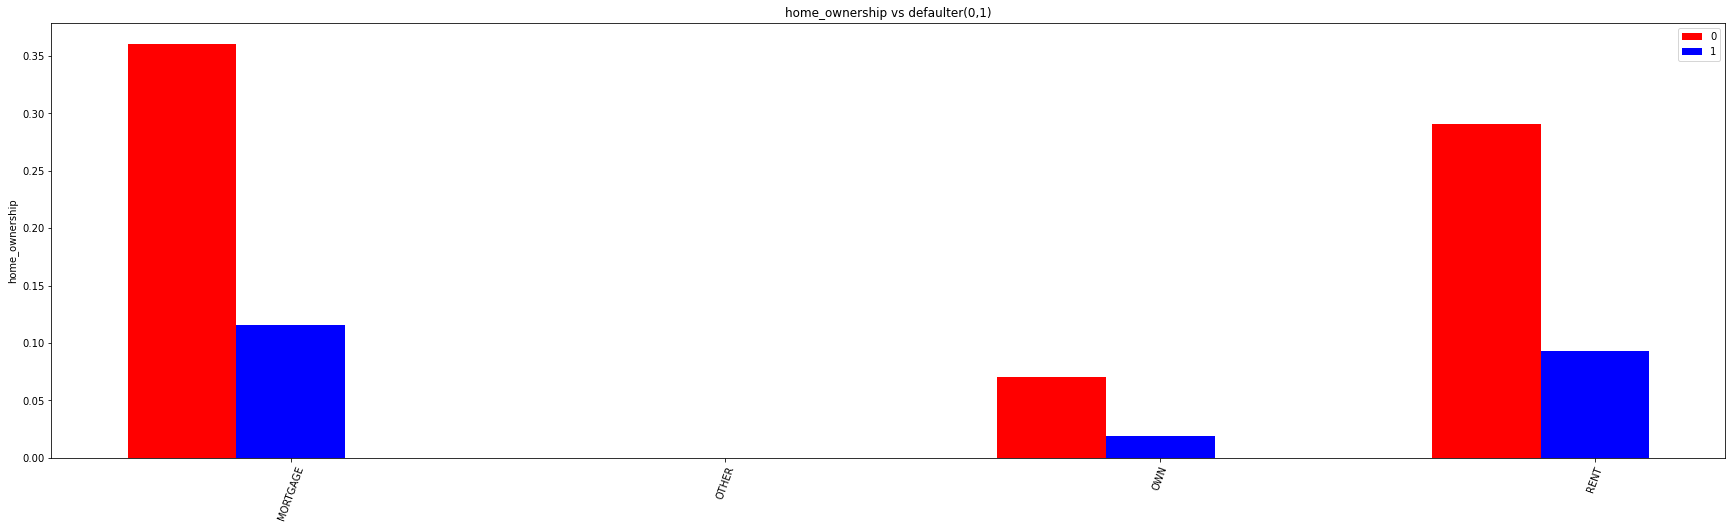

In [32]:
df.loc[df['home_ownership'] =='ANY', 'home_ownership'] = 'OTHER'
df.loc[df['home_ownership'] =='NONE', 'home_ownership'] = 'OTHER'
print(df.home_ownership.value_counts())
plot_bar('home_ownership')

Source Verified    192771
Not Verified       157048
Verified           155718
Name: verification_status, dtype: int64


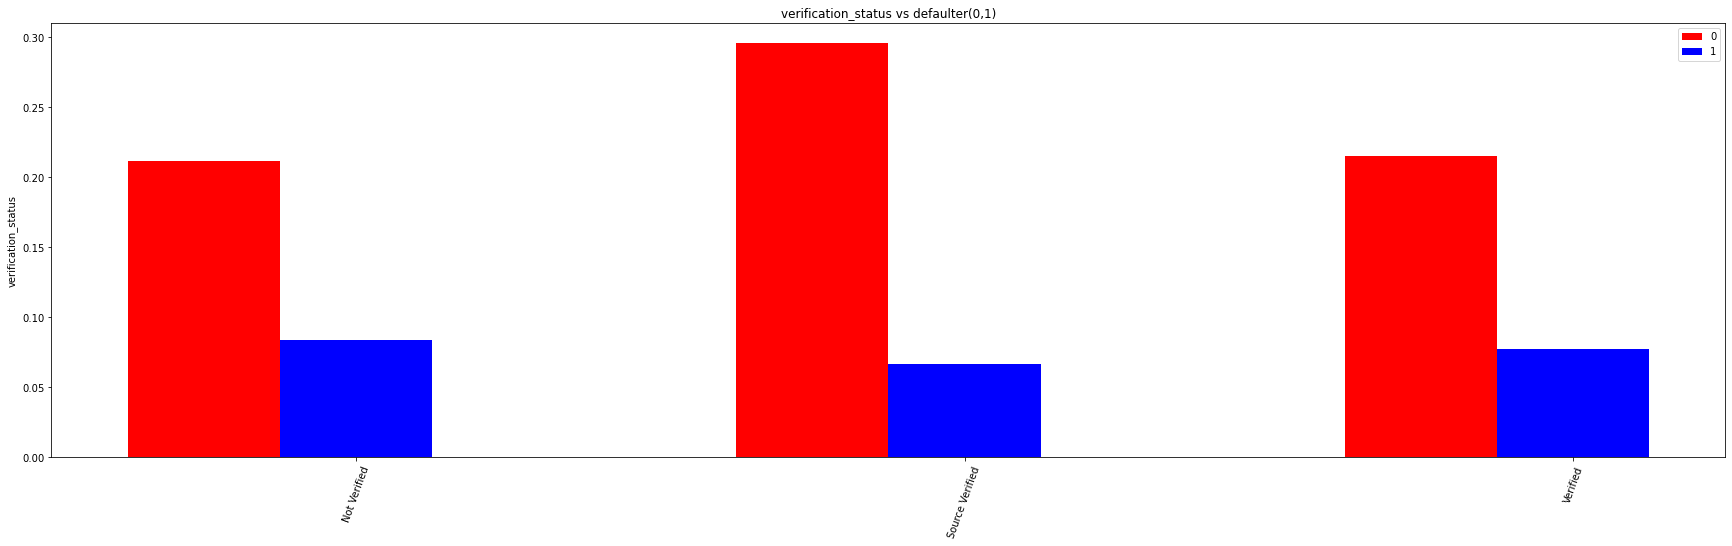

In [33]:
print(df.verification_status.value_counts())
plot_bar('verification_status')

debt_consolidation    300247
credit_card           116996
home_improvement       29098
other                  24003
major_purchase          9736
small_business          5966
car                     5026
medical                 4757
moving                  3051
vacation                2613
house                   2086
wedding                 1387
renewable_energy         316
educational              255
Name: purpose, dtype: int64


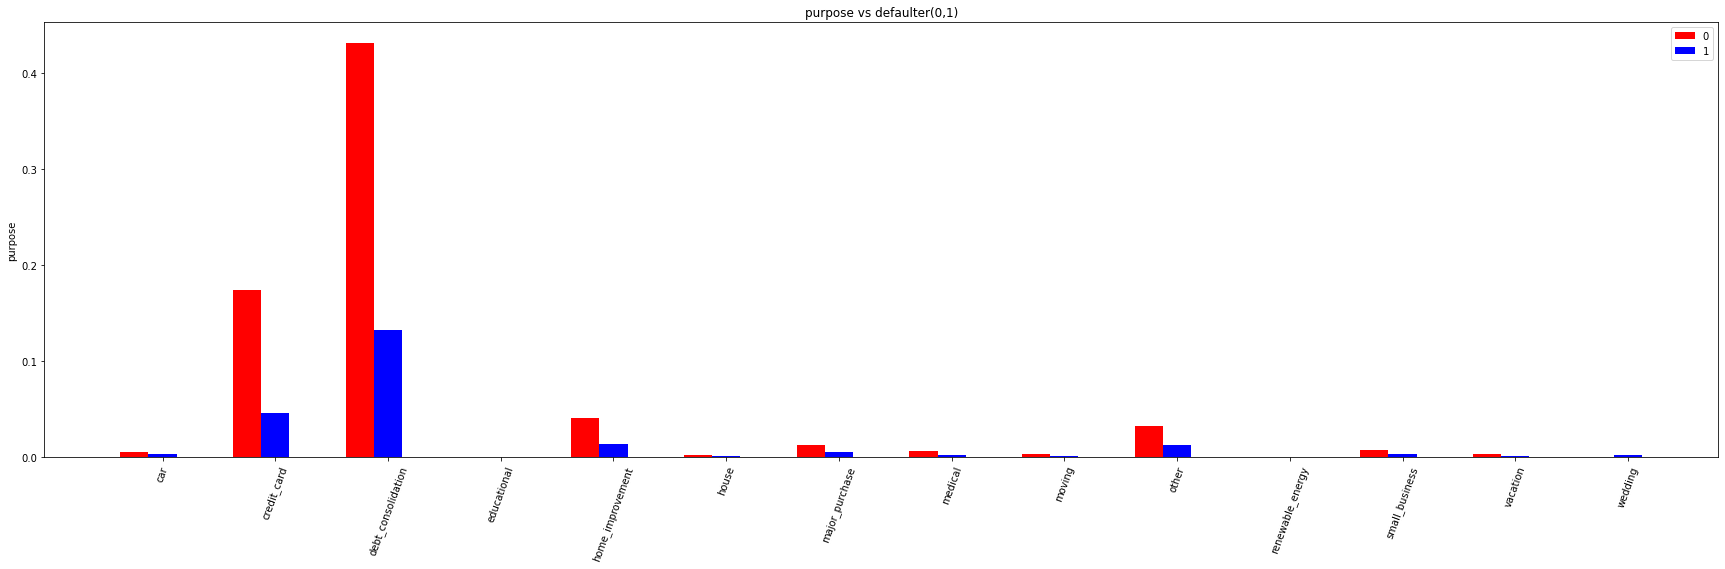

In [34]:
print(df.purpose.value_counts())
plot_bar('purpose')

INDIVIDUAL    505270
JOINT            267
Name: application_type, dtype: int64
loan_status            0       1
application_type                
INDIVIDUAL        383932  121338
JOINT                266       1


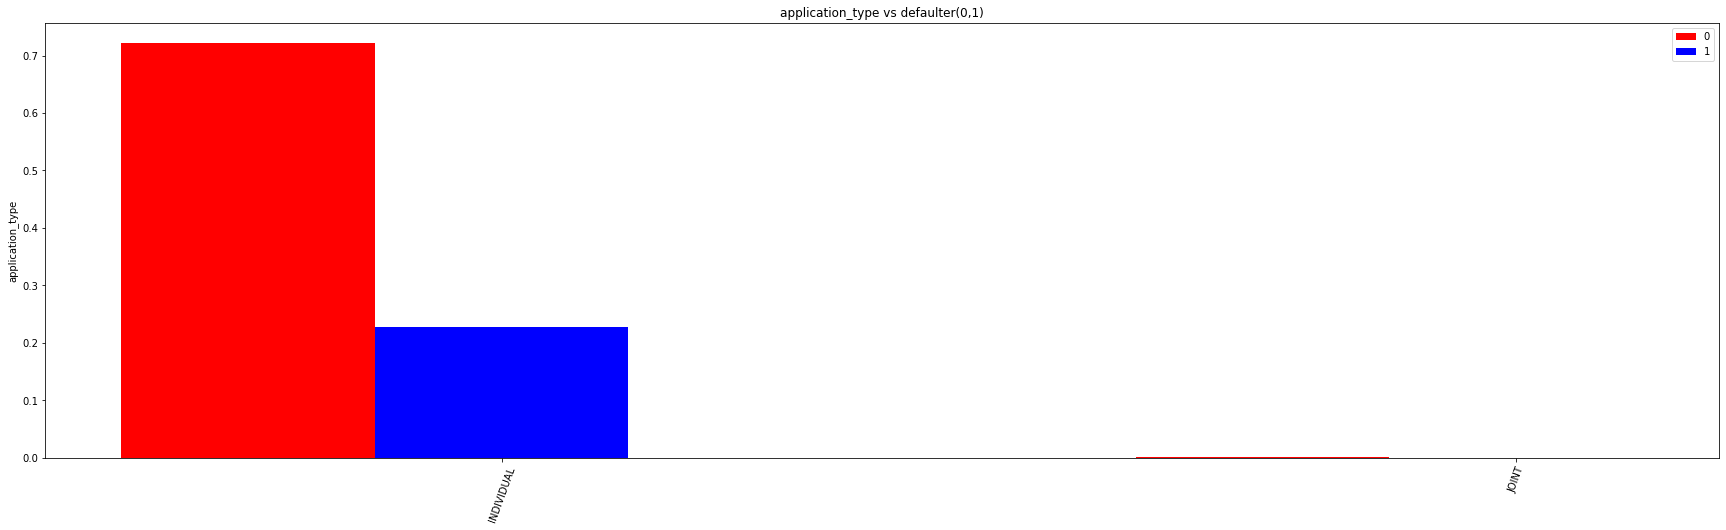

In [35]:
print(df.application_type.value_counts())
print(pivot('application_type'))
plot_bar('application_type')

loan_status       0      1
grade                     
A             61875  23099
B            106289  38821
C            109100  30771
D             61449  17427
E             32756   7674
F             10374   2808
G              2355    739


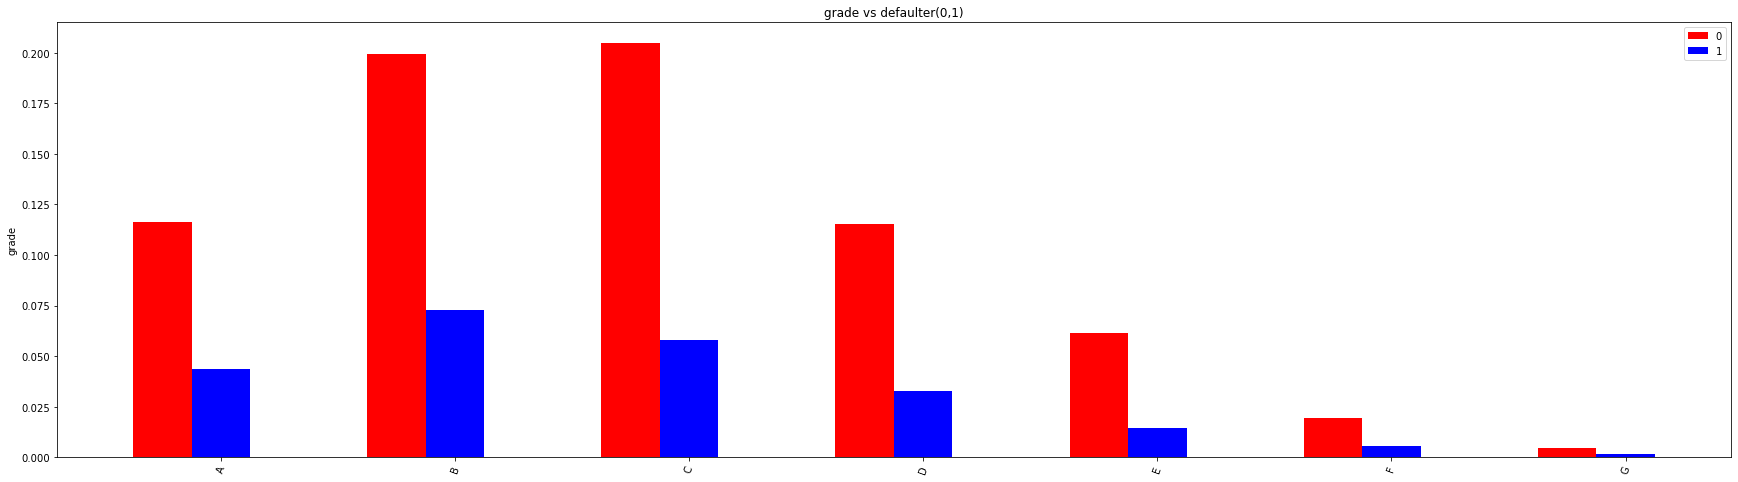

In [36]:
print(pivot('grade'))
plot_bar('grade')

loan_status               0      1
initial_list_status               
f                    172764  87485
w                    211434  33854


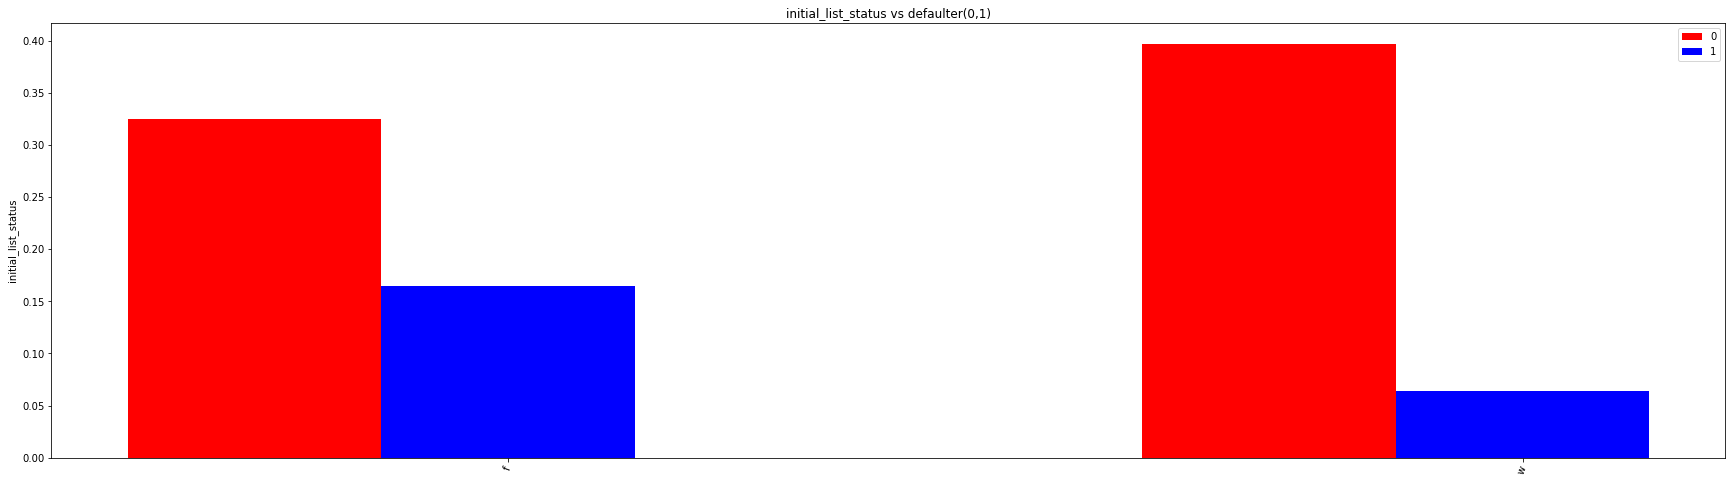

In [37]:
print(pivot('initial_list_status'))
plot_bar('initial_list_status')

In [38]:
'''  Droping columns based on number of empty values  '''

colsDropped = []
for col_names in df.columns:
    if(df[col_names].isnull().sum() > 26891):
        colsDropped.append(col_names)
        df = df.drop(col_names, axis = 1)
print (colsDropped)

['batch_enrolled', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [39]:
#Dropping unnecessary columns
colsToDrop = ['zip_code','pymnt_plan','application_type','title','emp_title']
for cols in colsToDrop:
    df = df.drop(cols, axis=1)

In [40]:
#Filling missing values with MEAN
colsFillMean = ['annual_inc','revol_util']
for cols in colsFillMean:
    df[cols].fillna(df[cols].mean(), inplace=True)

#Filling missing values with MODE
colsFillMode = ['delinq_2yrs','inq_last_6mths','open_acc','pub_rec','total_acc','collections_12_mths_ex_med','acc_now_delinq']
for cols in colsFillMode:
    df[cols].fillna(df[cols].mode()[0], inplace=True)
    
df.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
last_week_pay                 0
acc_now_delinq                0
loan_status                   0
dtype: i

In [41]:
df.sample(4)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,loan_status
83818,15470376,5675,5675,5675.0,36,20.20,E,E3,10.0,OWN,29900.0,Not Verified,car,NJ,8.59,0.0,0.0,2.0,0.0,6338.0,85.6,4.0,w,1467.23,0.0,0.0,0.0,0.0,87th week,0.0,0
460743,1638103,9850,9850,8000.0,36,15.31,C,C2,4.0,MORTGAGE,55500.0,Verified,debt_consolidation,AZ,21.95,0.0,0.0,12.0,0.0,48030.0,86.0,43.0,f,1493.40,0.0,0.0,0.0,0.0,61th week,0.0,1
371285,61038607,23975,23975,23975.0,60,24.99,F,F4,10.0,RENT,90000.0,Verified,other,MD,32.43,0.0,2.0,14.0,1.0,1935.0,17.4,26.0,f,2434.56,0.0,0.0,0.0,0.0,22th week,0.0,0
248162,8745256,14000,14000,14000.0,60,15.22,C,C3,10.0,RENT,85000.0,Verified,wedding,TX,4.14,0.0,0.0,11.0,0.0,2784.0,3.4,21.0,f,4128.68,0.0,0.0,0.0,0.0,122th week,0.0,0


In [42]:
for items in df.select_dtypes(include = ['object']):
    print(df[items].value_counts(),'\n')

B    145110
C    139871
A     84974
D     78876
E     40430
F     13182
G      3094
Name: grade, dtype: int64 

B3    32221
B4    31560
C1    30299
C2    29789
C3    28497
B2    27935
B5    27777
C4    27631
A5    25856
B1    25617
C5    23655
D1    20498
A4    19837
D2    17001
D3    14825
D4    14414
A3    13430
A1    12943
A2    12908
D5    12138
E1    10362
E2     9774
E3     8089
E4     6731
E5     5474
F1     4128
F2     3058
F3     2600
F4     1952
F5     1444
G1     1058
G2      793
G3      538
G4      380
G5      325
Name: sub_grade, dtype: int64 

MORTGAGE    253475
RENT        204379
OWN          47531
OTHER          152
Name: home_ownership, dtype: int64 

Source Verified    192771
Not Verified       157048
Verified           155718
Name: verification_status, dtype: int64 

debt_consolidation    300247
credit_card           116996
home_improvement       29098
other                  24003
major_purchase          9736
small_business          5966
car                     5026


In [43]:
def removeWeeks(x):
    x=x.replace("th", "")
    return int(x.split(" ")[0])
df.last_week_pay.replace("NAth week", "13th week", inplace=True)
df.last_week_pay = df.last_week_pay.apply(removeWeeks)

In [44]:
for items in df.select_dtypes(include = ['object']):
    print(df[items].value_counts(),'\n')

B    145110
C    139871
A     84974
D     78876
E     40430
F     13182
G      3094
Name: grade, dtype: int64 

B3    32221
B4    31560
C1    30299
C2    29789
C3    28497
B2    27935
B5    27777
C4    27631
A5    25856
B1    25617
C5    23655
D1    20498
A4    19837
D2    17001
D3    14825
D4    14414
A3    13430
A1    12943
A2    12908
D5    12138
E1    10362
E2     9774
E3     8089
E4     6731
E5     5474
F1     4128
F2     3058
F3     2600
F4     1952
F5     1444
G1     1058
G2      793
G3      538
G4      380
G5      325
Name: sub_grade, dtype: int64 

MORTGAGE    253475
RENT        204379
OWN          47531
OTHER          152
Name: home_ownership, dtype: int64 

Source Verified    192771
Not Verified       157048
Verified           155718
Name: verification_status, dtype: int64 

debt_consolidation    300247
credit_card           116996
home_improvement       29098
other                  24003
major_purchase          9736
small_business          5966
car                     5026


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505537 entries, 0 to 532427
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   member_id                   505537 non-null  int64  
 1   loan_amnt                   505537 non-null  int64  
 2   funded_amnt                 505537 non-null  int64  
 3   funded_amnt_inv             505537 non-null  float64
 4   term                        505537 non-null  int64  
 5   int_rate                    505537 non-null  float64
 6   grade                       505537 non-null  object 
 7   sub_grade                   505537 non-null  object 
 8   emp_length                  505537 non-null  float64
 9   home_ownership              505537 non-null  object 
 10  annual_inc                  505537 non-null  float64
 11  verification_status         505537 non-null  object 
 12  purpose                     505537 non-null  object 
 13  addr_state    

In [46]:
df1=df.copy()

In [47]:
y_train = df1.loan_status.values
np.save('y_train', y_train)
df1 = df1.drop('loan_status', axis=1)

In [48]:
print('Train: ',df1.shape)

Train:  (505537, 30)


In [49]:
le = preprocessing.LabelEncoder()

In [50]:
for cols in df1.select_dtypes(include=["object"]).columns:
    df1[cols] = df1[cols].astype('category')

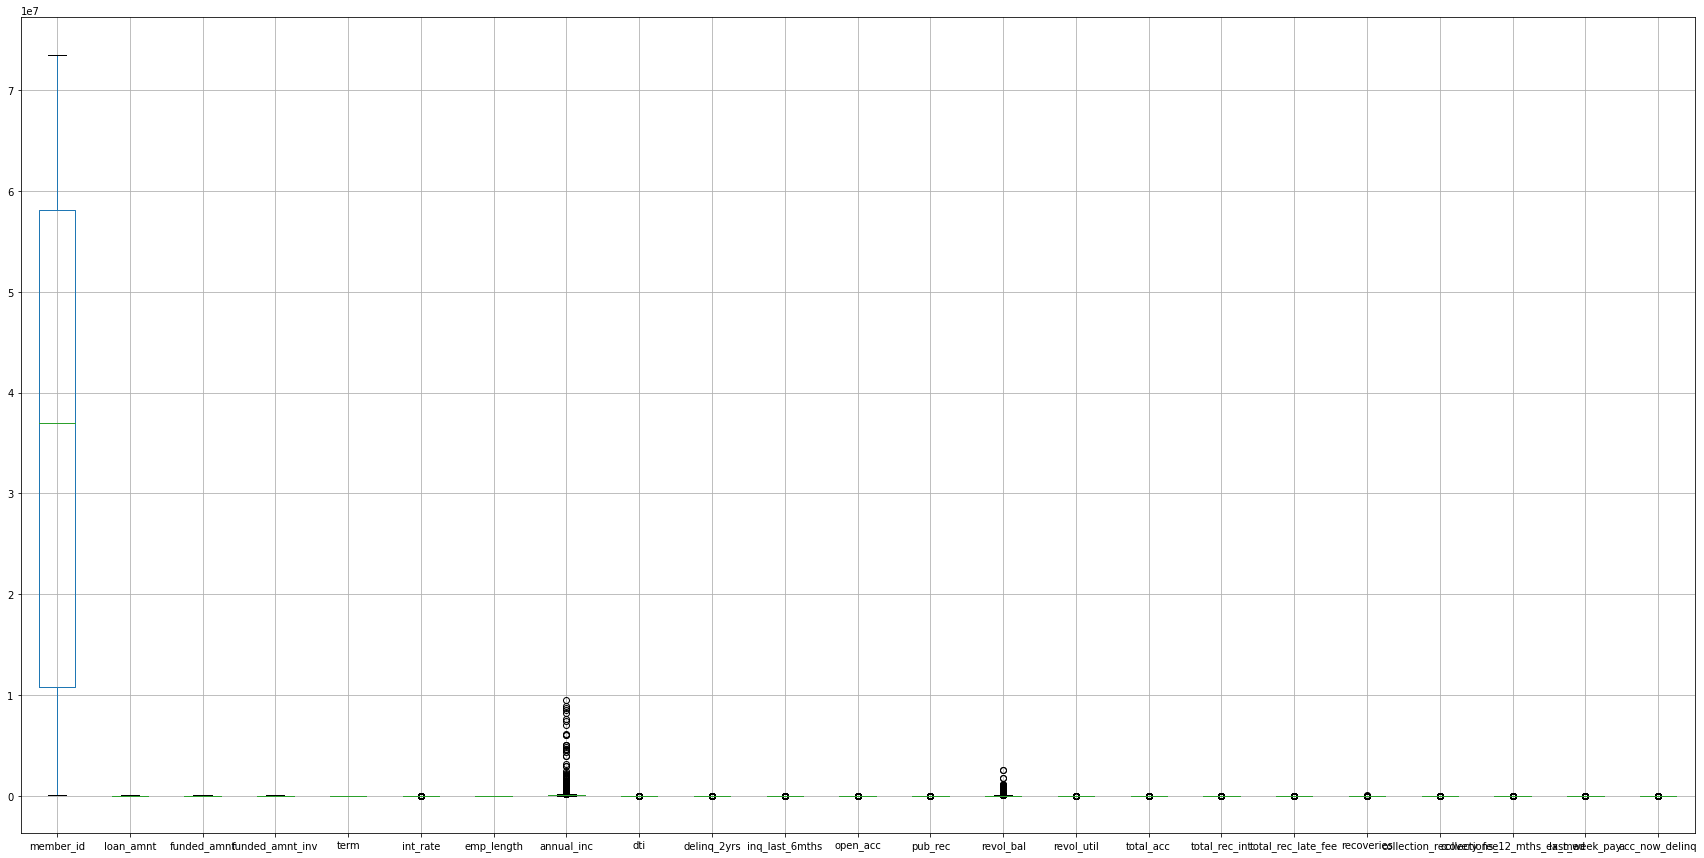

In [51]:
colu=[]
for cols in df1.select_dtypes(include=["int64","float64"]).columns:
    colu.append(cols)
int_col=df1[colu]
int_col.boxplot(figsize=(30,15))
plt.show()

In [52]:
df1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq
0,58189336,14350,14350,14350.0,36,19.19,E,E3,9.0,OWN,28700.0,Source Verified,debt_consolidation,FL,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,26,0.0
1,70011223,4800,4800,4800.0,36,10.99,B,B4,0.5,MORTGAGE,65000.0,Source Verified,home_improvement,MD,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,9,0.0
2,70255675,10000,10000,10000.0,36,7.26,A,A4,2.0,OWN,45000.0,Not Verified,debt_consolidation,OH,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,9,0.0
3,1893936,15000,15000,15000.0,36,19.72,D,D5,10.0,RENT,105000.0,Not Verified,debt_consolidation,VA,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,135,0.0
4,7652106,16000,16000,16000.0,36,10.64,B,B2,10.0,RENT,52000.0,Verified,credit_card,CA,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,96,0.0


In [53]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler = scaler.fit(df1[colu])
df1[colu] = scaler.transform(df1[colu])

In [54]:
#label encoding
ohc=[]
for cols in df1.select_dtypes(include=["category"]).columns:
    ohc.append(cols)
    df1[cols] = le.fit_transform(df1[cols])    

In [55]:
#One hot encoding
df1 = pd.get_dummies(df1, columns=ohc)

In [56]:
print('Train: ',df1.shape)

Train:  (505537, 139)


In [57]:
df1.head()

# Oops! i forgot to drop member_id

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,sub_grade_0,sub_grade_1,sub_grade_2,sub_grade_3,sub_grade_4,sub_grade_5,sub_grade_6,sub_grade_7,sub_grade_8,sub_grade_9,sub_grade_10,sub_grade_11,sub_grade_12,sub_grade_13,sub_grade_14,sub_grade_15,sub_grade_16,sub_grade_17,sub_grade_18,sub_grade_19,sub_grade_20,sub_grade_21,sub_grade_22,sub_grade_23,sub_grade_24,sub_grade_25,sub_grade_26,sub_grade_27,sub_grade_28,sub_grade_29,sub_grade_30,sub_grade_31,sub_grade_32,sub_grade_33,sub_grade_34,home_ownership_0,home_ownership_1,home_ownership_2,home_ownership_3,verification_status_0,verification_status_1,verification_status_2,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,addr_state_0,addr_state_1,addr_state_2,addr_state_3,addr_state_4,addr_state_5,addr_state_6,addr_state_7,addr_state_8,addr_state_9,addr_state_10,addr_state_11,addr_state_12,addr_state_13,addr_state_14,addr_state_15,addr_state_16,addr_state_17,addr_state_18,addr_state_19,addr_state_20,addr_state_21,addr_state_22,addr_state_23,addr_state_24,addr_state_25,addr_state_26,addr_state_27,addr_state_28,addr_state_29,addr_state_30,addr_state_31,addr_state_32,addr_state_33,addr_state_34,addr_state_35,addr_state_36,addr_state_37,addr_state_38,addr_state_39,addr_state_40,addr_state_41,addr_state_42,addr_state_43,addr_state_44,addr_state_45,addr_state_46,addr_state_47,addr_state_48,addr_state_49,addr_state_50,initial_list_status_0,initial_list_status_1
0,0.791209,0.410000,0.410000,0.410000,0.6,0.661952,0.90,0.003021,0.089034,0.0,0.032258,0.155556,0.011628,0.008764,0.081923,0.172840,0.048495,0.0,0.0,0.0,0.0,0.085526,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.951953,0.137143,0.137143,0.137143,0.6,0.379096,0.05,0.006842,0.009566,0.0,0.032258,0.066667,0.000000,0.002968,0.026000,0.080247,0.003468,0.0,0.0,0.0,0.0,0.029605,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.955277,0.285714,0.285714,0.285714,0.6,0.250431,0.20,0.004737,0.048406,0.0,0.000000,0.055556,0.000000,0.004234,0.034966,0.117284,0.002333,0.0,0.0,0.0,0.0,0.029605,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.025752,0.428571,0.428571,0.428571,0.6,0.680235,1.00,0.011053,0.039340,0.0,0.064516,0.111111,0.000000,0.005337,0.062199,0.129630,0.200723,0.0,0.0,0.0,0.0,0.444079,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.104047,0.457143,0.457143,0.457143,0.6,0.367023,1.00,0.005474,0.052979,0.0,0.000000,0.122222,0.000000,0.013949,0.085397,0.166667,0.094871,0.0,0.0,0.0,0.0,0.315789,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
x_train = df1.values
print("Training data shape: ", x_train.shape)
np.save('x_train', x_train)

Training data shape:  (505537, 139)


# Modelling

In [59]:
from sklearn import svm
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from IPython.display import clear_output
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [60]:
X = np.load("x_train.npy")
Y = np.load("y_train.npy")
print ("Training data: ",X.shape)
print ("Testing data: ",Y.shape)

Training data:  (505537, 139)
Testing data:  (505537,)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

### Random Forest

In [62]:
clf1 = ensemble.RandomForestClassifier(n_estimators=200)

In [63]:
cross_val_score(clf1, X_train, y_train, cv=10)

array([0.90220805, 0.90319709, 0.90435922, 0.90517518, 0.90487847,
       0.90450758, 0.90435922, 0.90408723, 0.90559553, 0.90660699])

In [64]:
clf1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [73]:
clf1_pred = clf1.predict(X_test)

In [74]:
clf1.score(X_test, y_test)*100

90.39442971871662

In [75]:
roc_auc_score(y_test,clf1_pred)*100

82.25453982390879

### Logistic Regression

In [76]:
clf2 = LogisticRegression(C=1.0)

In [77]:
cross_val_score(clf2, X_train, y_train, cv=10)

array([0.85658828, 0.8569839 , 0.86143461, 0.85886309, 0.86042084,
       0.8584922 , 0.86094009, 0.85782459, 0.86160769, 0.86118392])

In [78]:
clf2.fit(X_train,y_train)

LogisticRegression()

In [79]:
clf2_pred = clf2.predict(X_test)

In [80]:
clf2.score(X_test, y_test)*100

86.04165842465483

In [81]:
roc_auc_score(y_test,clf2_pred)*100

76.50208921140532

### Gradient Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
clf3 = GradientBoostingClassifier(n_estimators=50)

In [85]:
cross_val_score(clf3, X_train, y_train, cv=10)

array([0.90930445, 0.90952699, 0.9114309 , 0.91041713, 0.91088693,
       0.91195015, 0.91066439, 0.91019459, 0.91106001, 0.9129865 ])

In [86]:
clf3.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [87]:
clf3_pred = clf3.predict(X_test)

In [88]:
clf3.score(X_test, y_test)*100

91.18467381413934

In [89]:
roc_auc_score(y_test,clf3_pred)*100

84.67485748865046

### Decision Tree

In [90]:
from sklearn import tree

clf4 = tree.DecisionTreeClassifier(criterion='entropy')

In [91]:
cross_val_score(clf4, X_train, y_train, cv=10)

array([0.9065104 , 0.9059417 , 0.90606533, 0.90678239, 0.90772198,
       0.90552135, 0.90955171, 0.90727691, 0.90784561, 0.90574156])

In [92]:
clf4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [93]:
clf4_pred = clf4.predict(X_test)

In [94]:
clf4.score(X_test, y_test)*100

90.70894489061202

In [95]:
roc_auc_score(y_test,clf4_pred)*100

87.3490655848602